<a href="https://colab.research.google.com/github/HegRaj/Assignment2/blob/main/Week_4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#Import Dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Cirrhosis - Cirrhosis.csv')

In [4]:
print(data.columns)
print(data.shape)

Index(['index', 'duration', 'status', 'drug', 'age', 'sex', 'ascites',
       'hepatomology', 'spiders', 'edema', 'bilirubin', 'cholesterol',
       'albumin', 'copper', 'phosphatase', 'SGOT', 'triglicerides',
       'platelets', 'prothrombin', 'stage'],
      dtype='object')
(312, 20)


In [5]:
data.head(5)

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [6]:
data.dtypes

,0
index,int64
duration,int64
status,int64
drug,int64
age,int64
sex,int64
ascites,int64
hepatomology,int64
spiders,int64
edema,float64


#Feature Engineering

In [8]:
data['age_years'] = (data['age'] / 365).astype(int)

# Handling Missing Value

In [7]:
data.isnull().sum()

,0
index,0
duration,0
status,0
drug,0
age,0
sex,0
ascites,0
hepatomology,0
spiders,0
edema,0


In [9]:
data

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage,age_years
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4,58
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3,56
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4,70
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4,54
4,5,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,0,1,22347,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2,61
308,309,994,0,2,21294,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2,58
309,310,939,0,1,22767,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2,62
310,311,839,0,1,13879,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2,38


## GroupBy Mean Imputation

In [10]:
for column in data.columns:
    if column != 'stage':
        data[column] = data.groupby('stage')[column].transform(lambda x: x.fillna(x.mean()))

In [11]:
data.isnull().sum()

,0
index,0
duration,0
status,0
drug,0
age,0
sex,0
ascites,0
hepatomology,0
spiders,0
edema,0


In [12]:
data['drug'] = data['drug'].replace(2, 0)

In [13]:
data['drug'].unique()

array([1, 0])

---

#Splitting Train Test Datasets

In [14]:
df_s = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
train_size = int(0.9 * len(df_s))

In [16]:
train_df = df_s[:train_size]
test_df = df_s[train_size:]

In [17]:
train_df.shape

(280, 21)

In [18]:
test_df.shape

(32, 21)

---

# Selecting X Variables

In [19]:
y = train_df['drug'].to_numpy()

X = train_df[['sex', 'ascites',
       'hepatomology', 'spiders', 'edema', 'bilirubin', 'cholesterol',
       'albumin', 'copper', 'phosphatase', 'SGOT', 'triglicerides',
       'platelets', 'prothrombin', 'stage','age_years']].to_numpy()

In [20]:
y_test = test_df['drug'].to_numpy()

X_test = test_df[['sex', 'ascites',
       'hepatomology', 'spiders', 'edema', 'bilirubin', 'cholesterol',
       'albumin', 'copper', 'phosphatase', 'SGOT', 'triglicerides',
       'platelets', 'prothrombin', 'stage','age_years']].to_numpy()

In [21]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [22]:
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

---

In [23]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(("#FF0000", "#0000FF"))
cmap_light = ListedColormap(("#FFBBBB", "#BBBBFF"))

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

def softmax(H):
  return (np.exp(H.T)/np.sum(np.exp(H), axis=1)).T

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [26]:
class MVLogisticRegression():

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve = False):
    epochs = int(epochs)
    N,D= X.shape

    K = len(np.unique(y))
    Y = indices_to_one_hot(y, K).astype(int)

    # Initialize Weights and Biases
    self.W = np.random.randn(D,K)
    self.B = np.random.randn(K)

    J = np.zeros(epochs)

    #SGD
    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y, P_hat)
      #Weight update Rules
      self.W -= eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y, axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self, X):
    return sigmoid(X@self.W+self.B)

  def predict(self,X):
    return np.argmax(self.__forward__(X),axis=1)

In [27]:
mv_longreg = MVLogisticRegression()

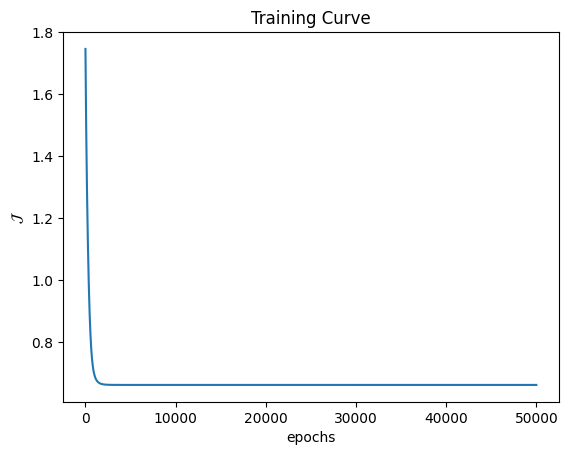

In [28]:
mv_longreg.fit(X, y, show_curve=True, eta=2e-2, epochs=5e4)

In [29]:
y_hat = mv_longreg.predict(X)

In [30]:
accuracy(y, y_hat)

0.5964285714285714

In [31]:
y_hat_test = mv_longreg.predict(X_test)

In [32]:
accuracy(y_test, y_hat_test)

0.625

---

#Logistic Regression

In [33]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

def cross_entropy(y, p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [34]:
class LogisticRegression():

  def __init__(self, thresh=0.5):
    self.thresh = thresh
    self.W = None
    self.b = None

  def fit(self, X, y, eta=1e-3, epochs=1e-3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape

    self.W = np.random.randn(D)
    self.b = np.random.randn(1)

    J = np.zeros(epochs)

    #SGD
    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch] = cross_entropy(y, p_hat)

    #weight update Rules
      self.W -= eta*(1/N)*X.T@(p_hat-y)
      self.b -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self, X):
    return sigmoid(X@self.W+self.b)

  def predict(self, X):
    return (self.__forward__(X)>= self.thresh).astype(np.int32)

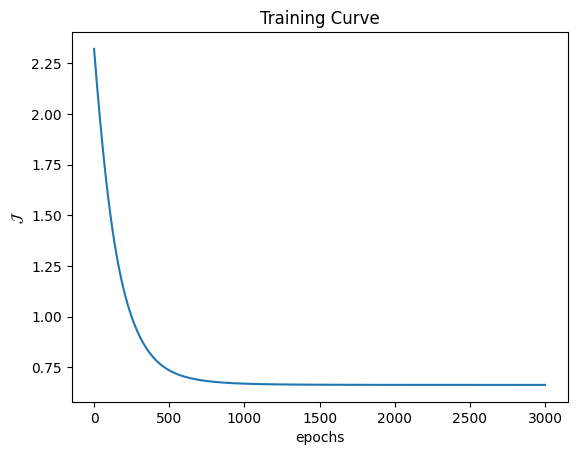

In [35]:
log_reg = LogisticRegression(thresh=0.51)
log_reg.fit(X, y, epochs=3000, eta=2e-2, show_curve=True)

In [36]:
y_hat = log_reg.predict(X)

## LR Train Accuracy

In [37]:
accuracy(y, y_hat)

0.5892857142857143

In [38]:
y_hat_test = log_reg.predict(X_test)

## LR Test Accuracy

In [40]:
accuracy(y_test, y_hat_test)

0.625

---

#ANN

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [273]:
cmap_bold = ListedColormap(["#FF0000","#00FF00","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBFFBB","#BBBBFF"])

In [274]:
# Activations

def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH=np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

#Loss Functions

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
  return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

#Misc

def one_hot(y):
  N=len(y)
  K=len(set(y))
  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]]=1

  return Y

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def R2(y,y_hat):
  return 1-np.sum((y-y_hat)**2)/np.sum((y - y.mean())**2)

In [304]:
def derivative(Z, a):

  if a == linear:
    return 1
  elif a == sigmoid:
    return Z*(1-Z)
  elif a == np.tanh:
    return 1-Z*Z
  elif a == ReLU:
    return (Z>0).astype(int)

  else:
    ValueError("Unknown Activation")

In [305]:
class ANN():

  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture)+1

  def fit (self, X, y, eta=1e-3, epochs=1e3,show_curve=False):
    epochs= int(epochs)
    if self.mode:
      Y=y
      K=1
    else:
      Y = one_hot(y)
      K = Y.shape[1]

    N,D = X.shape


    #Initialize Weights and Biases: Stochastic
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture +[K])),1)}
    self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture+[K],1)}

    #Activations
    if self.activations is None:
      self.a = {l: ReLU for l in range(1,self.L)}
    else:
      self.a ={l: act for l , act in enumerate(self.activations,1)}

    #Output Activation Functions
    if self.mode:
      self.a[self.L]=linear
    else:
      self.a[self.L]=sigmoid

    J = np.zeros(epochs)

    #Grad Descent/ Back prop

    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch]= OLS(Y, self.Z[self.L])
      else:
        J[epoch]=cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L]-Y)

      for l in sorted (self.W.keys(), reverse=True):

        dW = self.Z[l-1].T@dH
        db = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ =dH@self.W[l].T
          dH =dZ*derivative(self.Z[l-1], self.a[l-1])

    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel("epochs")
        plt.ylabel("$\mathcal{J}$")
        plt.show()

  def __forward__(self, X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.b[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

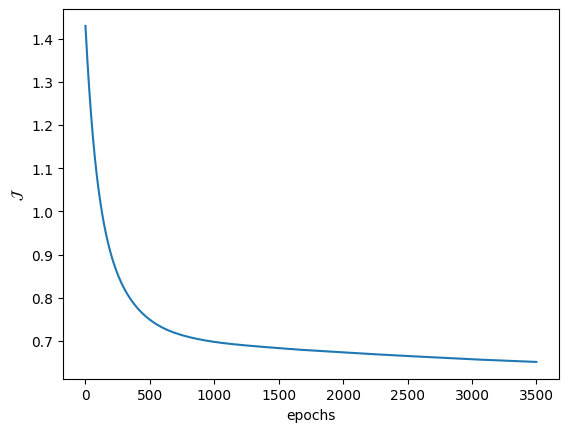

In [322]:
my_ann_classifier = ANN(architecture=[6,4,8], activations=[np.tanh,ReLU,np.tanh])
my_ann_classifier.fit(X,y, eta=4e-3, epochs=3500, show_curve=True)

#Train Accuracy

In [323]:
y_hat=my_ann_classifier.predict(X)

In [324]:
accuracy(y,y_hat)

0.6357142857142857

#Test Accuracy

In [325]:
y_hat_test = my_ann_classifier.predict(X_test)

In [326]:
accuracy(y_test , y_hat_test)

0.53125

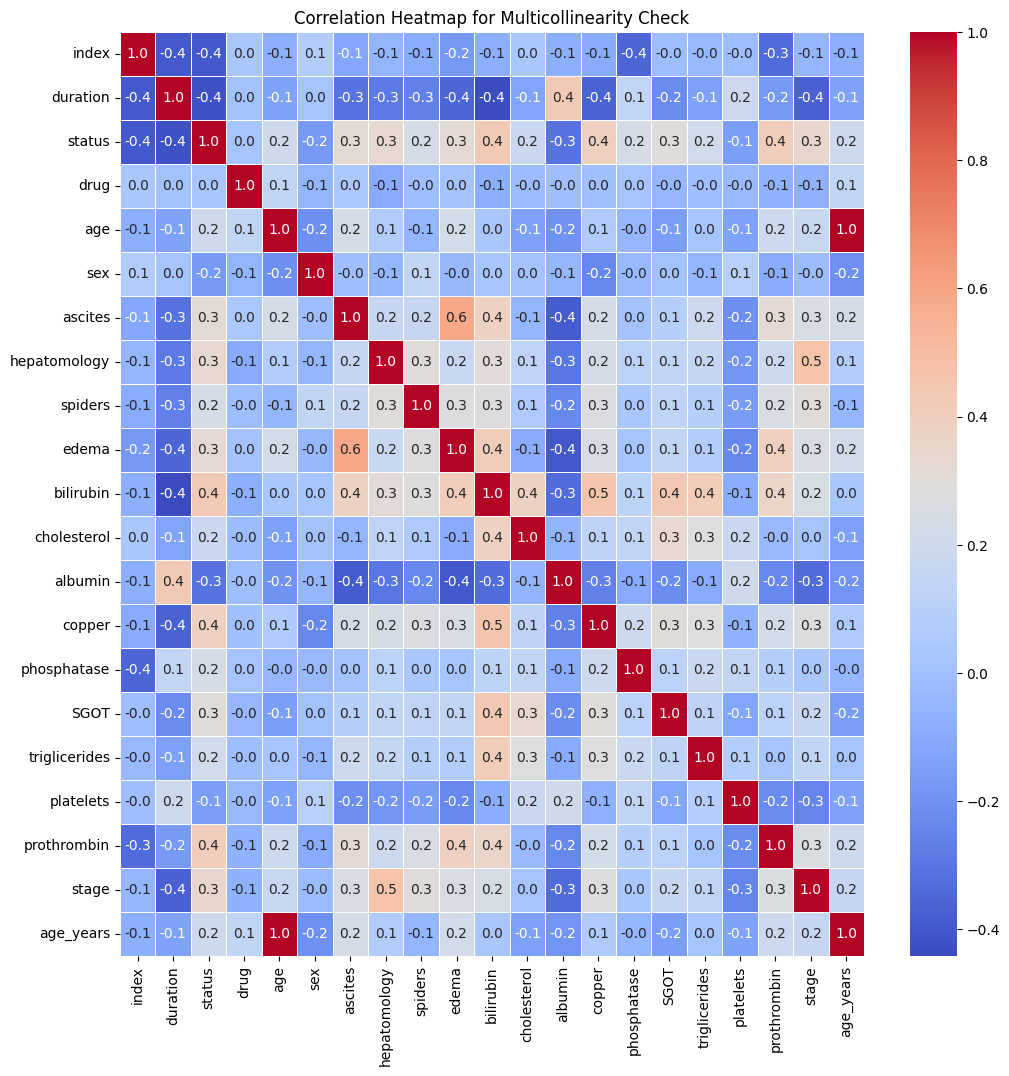

In [328]:
numerical_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns


correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".1f")
plt.title('Correlation Heatmap for Multicollinearity Check')
plt.show()